In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
from mpl_toolkits.axes_grid1 import AxesGrid

## EE 224 PSet 1
Kapil Dheeriya

# Problem 3

### Part A (7 Points)

In [2]:
pauli = np.array((((0, 1), (1, 0)), ((0, -1j), (1j, 0)), ((1, 0), (0, -1))))
I2 = np.eye(2)
a = np.zeros((2**5,2**5))

#generate list of length 5 for pauli 1,2, or 3 matrices for the qubit in the nth position of the list.
def paulilist(n: int):
    s=[]
    for i in range(1,6):
        mat = pauli[n-1] if i == 1 else I2
        for j in range(1,5):
            if i==j+1:
                mat = np.kron(mat, pauli[n-1])
            else: 
                mat = np.kron(mat, I2)
        s.append(mat)
    return s

px = paulilist(1)
py = paulilist(2)
pz = paulilist(3)
px

[array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]]),
 array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]]),
 array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
        ...,
        [0.+

In [3]:
#Plot code adapted from Andrii Torchylo
def heatmap2d(arr: np.ndarray):
    # define axes grid
    fig = plt.figure(frameon=False,figsize=(12, 8))
    fig.subplots_adjust(top=0.95)
    grid = AxesGrid(
        fig, 111, 
        nrows_ncols=(1, 2),
        axes_pad=0.5,
        cbar_mode='each',
        cbar_location='right',
        cbar_pad=0.1
    )   
    # plot 
    real_image = grid[0].imshow(np.real(arr), cmap='plasma')
    grid[0].set_title("Real Part of matrix, $\Re{(M)}$", fontsize=20)
    imag_image = grid[1].imshow(np.imag(arr), cmap='plasma')
    grid[1].set_title("Imaginary Part of matrix, $\Im{(M)}$", fontsize=20)
    cbar = grid.cbar_axes[0].colorbar(real_image)
    cbar = grid.cbar_axes[1].colorbar(imag_image)
    plt.show()

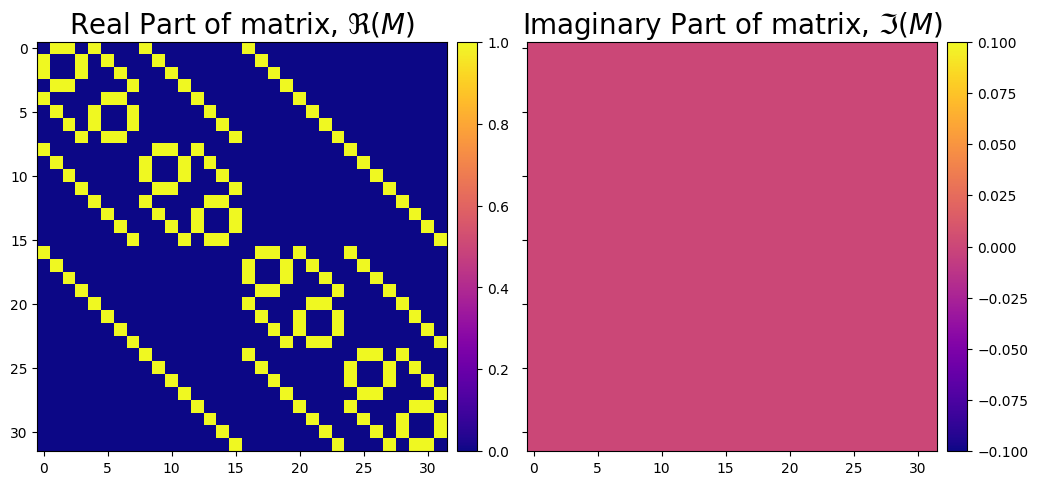

In [4]:
sum1 = sum(px)
heatmap2d(sum1)

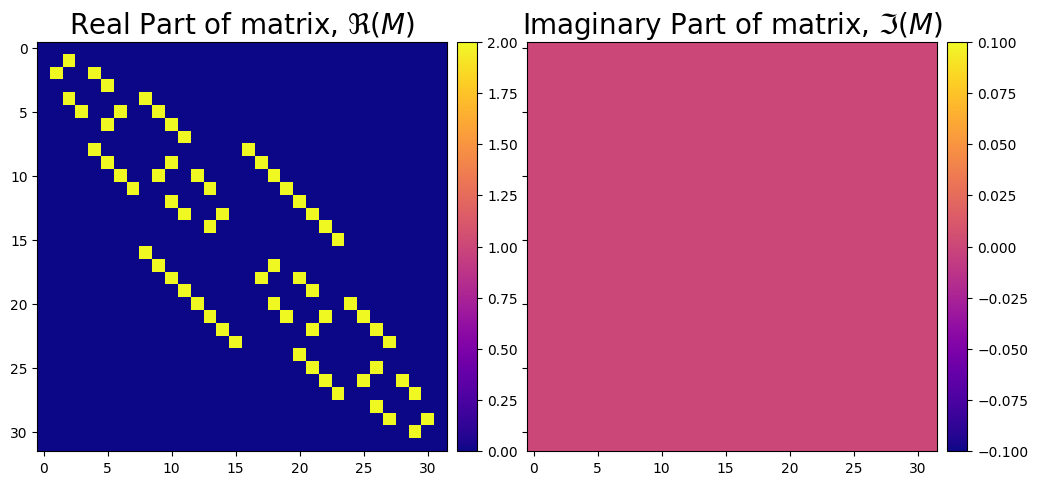

In [5]:
sum2 = np.zeros((32,32))
for i in range(0,4):
    sum2 = np.add(sum2, px[i]@px[i+1] + py[i]@py[i+1])
heatmap2d(sum2)

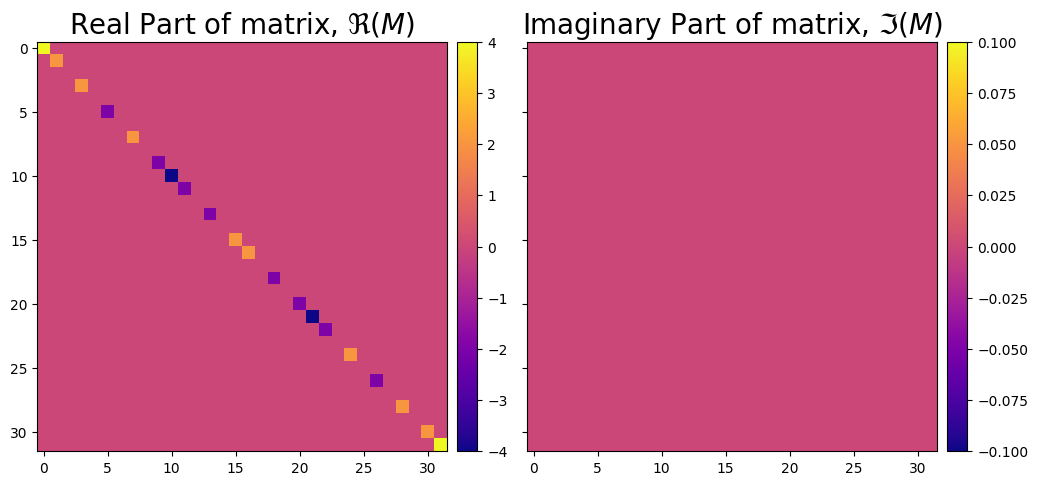

In [6]:
sum3 = np.zeros((32,32))
for i in range(0,4):
    sum3 = np.add(sum3, pz[i]@pz[i+1])
heatmap2d(sum3)

Part B

In [7]:
H = sum1 + 0.3*sum2 + 0.1*sum3
evals, evecs = np.linalg.eig(H)
ind = np.argsort(evals)
print(ind)
for i in ind[0:3]:
    print(i)
    print(f'eigenvalue: {(np.real(evals[i]))} \n real part of eigenvector: {np.real(evecs[i])} \n\
          imaginary part of eigenvector: {np.real(evecs[i])}')  

[ 3  4 16  7  8 24 15 25 14 13 28 31 20 21 19 30 22 29 18 17 27 26 11 10
 23  9  5 12  2  6  1  0]
3
eigenvalue: -3.856859413355618 
 real part of eigenvector: [ 0.16224366  0.06399334 -0.1115852   0.20055646  0.12845273  0.08500861
  0.32085904  0.02409754  0.12705021  0.07189047  0.37971293 -0.11310387
  0.10835284  0.09476188  0.09622675  0.06328029  0.11501783  0.1159349
 -0.09635677 -0.38786869 -0.04650349 -0.10217247  0.07939025 -0.13873189
 -0.35784902  0.13448401 -0.28428028 -0.01522595 -0.00975864  0.09176781
 -0.13473047 -0.31460397] 
          imaginary part of eigenvector: [ 0.16224366  0.06399334 -0.1115852   0.20055646  0.12845273  0.08500861
  0.32085904  0.02409754  0.12705021  0.07189047  0.37971293 -0.11310387
  0.10835284  0.09476188  0.09622675  0.06328029  0.11501783  0.1159349
 -0.09635677 -0.38786869 -0.04650349 -0.10217247  0.07939025 -0.13873189
 -0.35784902  0.13448401 -0.28428028 -0.01522595 -0.00975864  0.09176781
 -0.13473047 -0.31460397]
4
eigenvalue: -3.6

# Problem 4

In [8]:
D = 2**10
#Generates Harr random state
def genHarr(D):
    rng = np.random.default_rng() 
    ak = rng.normal(0.0, 1.0, D)
    bk = rng.normal(0.0, 1.0, D)
    return ((np.linalg.norm(ak + 1j*bk))**-1)*(ak + 1j*bk)

In [9]:
def vnentropy(vec):
    #Reshape ket vector into square matrix to get psihat operator
    psihat = vec.reshape(int(np.sqrt(vec.size)), int(np.sqrt(vec.size)))
    #Compute SVD of psihat to get the (square root) of the eigenvalues of the partial density operator.
    #These eigenvalues are precisely the Schmidt coefficients.
    d = np.linalg.svd(psihat, compute_uv=False)
    #Compute Von Neumann entropy using Schmidt coefficients.
    return -sum((d**2) * np.log((d**2)))

In [10]:
vnentropy(genHarr(D))

2.9651312497781

2.966274592007376
0.01559629979303157


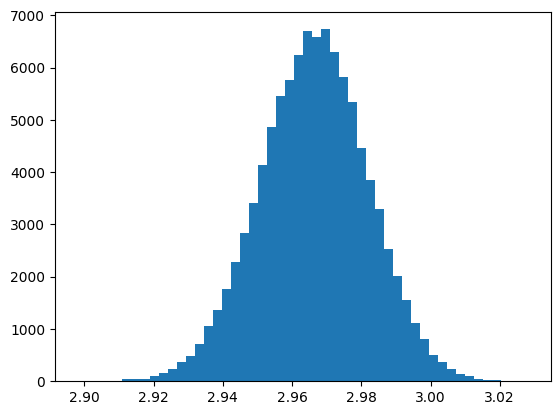

In [11]:
data = []
for i in range(0,100000):
    data.append(vnentropy(genHarr(D)))
plt.hist(data, 50)
plt.show
print(np.mean(data))
print(np.std(data))

The mean entanglement entropy for a Harr random state of dimension 2^10 (corresponding to a 10 qubit system partitioned into two subsystems of 5 qubits) is 2.966. The mean standard deviation is 0.0156. The histogram (n = 100,000 random states) appears to be a gaussian distribution.

Extra Credit:
Numerical analysis repeated for N = 1 up to N = 10. Plot is of the mean entanglement entropy values as a function of N.

In [12]:
def genEntropy(n: int, m: int): 
    means=[]
    sdratio = []
    for i in range(1,n+1):
        y=[]
        sd = []
        for j in range(0,m):
            y.append(vnentropy(genHarr(2**(2*i))))
        means.append(np.mean(y))
        #sd.append(np.std(y))
        #sdratio.append(np.array(np.array(sd) / np.array(means)))
    return [np.linspace(1,n,n), means]

gen = genEntropy(10,20)
print(gen[0])
plt.plot(gen[0],gen[1])
#plt.plot(gen[0],gen[2])

KeyboardInterrupt: 

In [5]:
def paulilist3(n: int, m: int):
    s=[]
    for i in range(1,m+1):
        mat = pauli[n-1] if i == 1 else I2
        for j in range(1,m):
            if i==j+1:
                mat = np.kron(mat, pauli[n-1])
            else: 
                mat = np.kron(mat, I2)
        s.append(mat)
    return s

px3=paulilist3(1,2)
py3=paulilist3(2,2)
pz3=paulilist3(3,2)

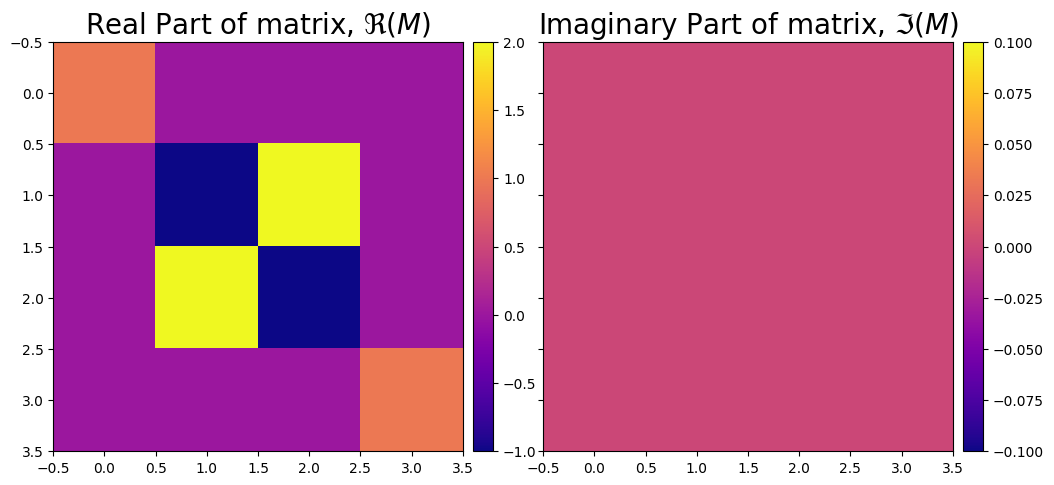

In [19]:
heatmap2d(px3[0]@px3[1]+py3[0]@py3[1]+pz3[0]@pz3[1])

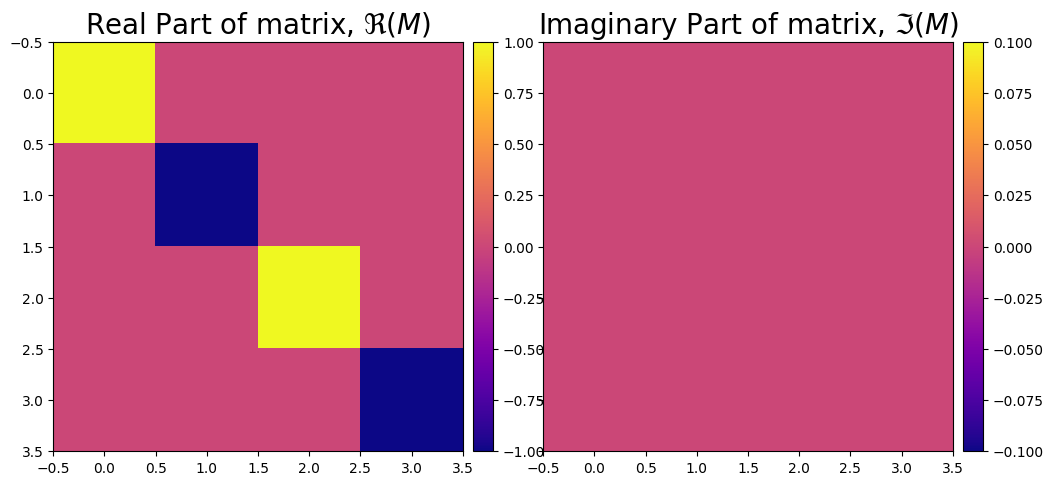

In [11]:
heatmap2d(pz3[1
              ])